**TP4**


**OUKDACH Yassine**

In [ ]:
# import Brown corpus
import nltk
from nltk.corpus import brown
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('brown')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
from nltk.stem.wordnet import WordNetLemmatizer
from string import punctuation


In [ ]:
stop_words = set(stopwords.words('english'))
punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''

In [ ]:
def to_lower(text):
    """
    Converting text to lower case 
    """
    if type(text) == str:
      text = word_tokenize(text)
    return ' '.join([w.lower() for w in text])

In [ ]:
def strip_punctuation(s):
    return ''.join(c for c in s if c not in punctuation)

'yassine oukdach '

In [ ]:
def Limatazer(text):
  wordnet_lemmatizer = WordNetLemmatizer()
  word_tokens = nltk.word_tokenize(text)
  lemmatized_word = [wordnet_lemmatizer.lemmatize(word) for word in word_tokens]
  return lemmatized_word

In [ ]:
def Remove_stopwords(text):
  word_tokens = nltk.word_tokenize(text)
  removing_stopwords = [word for word in word_tokens if word not in stop_words]
  return removing_stopwords


In [ ]:
data = []
for word in enumerate(brown.fileids()):
  text = brown.words(word[1])
  text = strip_punctuation(text)
  text = Remove_stopwords(text)
  text = to_lower(text)
  text = Limatazer(text)
  data.append(' '.join(text))

In [ ]:
len(data)

500

La forme matricielle de les 500 documents 

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import  TfidfVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation, TruncatedSVD

In [ ]:
 # CountVectorizer for lda
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
tf = vectorizer.fit_transform(data)
c_feature_names = vectorizer.get_feature_names()
type(feature_names)
# TfidfVectorizer for SVD and NMF
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(data)
tfidf_feature_names = tfidf_vectorizer.get_feature_names()

In [ ]:
no_topics = 10
nmf_model = NMF(n_components=no_topics,random_state=1,alpha=.1,l1_ratio=.5,init='nndsvd').fit(tfidf)

svd_model = TruncatedSVD(n_components=no_topics, algorithm='randomized', n_iter=100, random_state=122).fit(tfidf)

lda_model = LatentDirichletAllocation(n_components=no_topics,  max_iter=5, learning_method='online', learning_offset=50., random_state=0).fit(tf)

In [ ]:
n_top_words = 20
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % topic_idx)
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))

In [ ]:
topics_nmf = print_top_words(nmf_model,tfidf_feature_names,n_top_words )

In [ ]:
topics_svd= print_top_words(svd_model,tfidf_feature_names,n_top_words )

In [ ]:
topics_lda = print_top_words(lda_model,c_feature_names,n_top_words )


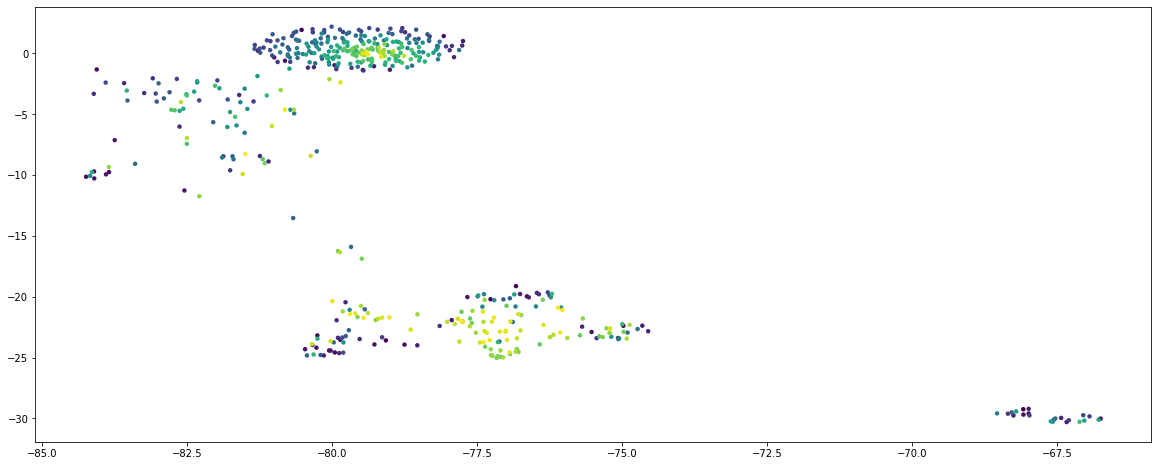

In [ ]:
import matplotlib.pyplot as plt
import umap

X_topics = nmf_model.fit_transform(tfidf)
embedding = umap.UMAP(n_neighbors=150, min_dist=0.5, random_state=12).fit_transform(X_topics)

plt.figure(figsize=(20, 8))
plt.scatter(embedding[:, 0], embedding[:, 1], 
            c=[i for i in range(0, len(brown.fileids()))],
            s=20,
            edgecolor='none')

plt.show()

In [ ]:
import pyLDAvis
import pyLDAvis.sklearn

pyLDAvis.enable_notebook()

display_data = pyLDAvis.sklearn.prepare(lda_model, tf, vectorizer)
                        
pyLDAvis.display(display_data)